# Uninformed Search Problems
A Google Colaboratory Notebook created as support material for the "Let's learn AI" YouTube series: https://www.youtube.com/channel/UCQFtF8uYQuzmOpzrmKnX77Q  

(C) 2021 - #loudpumpkins

# Prelude

A person, travelling with a wolf, a goat and a cabbage arrives at a river. There is a single small boat to afford
passage across the river. The boat can hold the person and only one of the wolf, goat or cabbage. The person must ferry his animals and vegetable across the river making as many trips as necessary to do so. However, if the goat is left unattended with the cabbage, the goat will eat the cabbage. Similarly if the wolf is left unattended with the goat, the wolf will eat the goat. How can the person ferry all items across the river without anything being eaten?

One way to solve the problem is through trial and error and keep track of the state of the problem in our minds. For small problems like the cabbage / goat / wolf problems, one can arrive to a solution such as:  

_goat > human > wolf > goat > cabbage > human > goat_

Alternatively, you may choose to draw a graph to exhaust every possible path until you arrive at a solution.

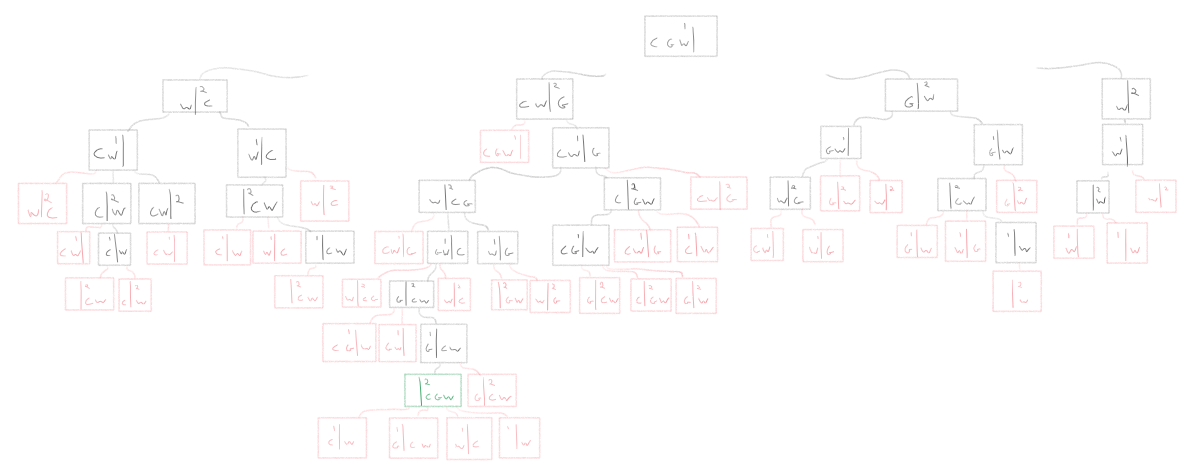

# Overture

In this report, we will explore and analyze different methods to solve problems of this nature. We will also introduce another problem ('8 puzzle') which will demonstrate how generic problem-solving algorithms can start to fail us.

The following is a python class to represent a node in the search tree:

In [19]:
class Node(object):
  """
  A single node in a search tree.

  Members:
    state - The state to which the node corresponds.
    parent - The node in the tree that generated this node. `None` for root
      nodes.
    action - the action that was applied to the parent's state to generate
      this node. `None for root nodes.
    path_cost - The total cost of the path from the initial state to this
      node. Denoted as g(n). `0` for root nodes
  """

  def __init__(self, state, parent=None, action=None):
    self.state = state
    self.parent = parent
    self.action = action

  def __repr__(self):
    if self.parent is None:
      return f"<Node '{self.state}' (root node)>"
    return f"<Node '{self.state}' (parent '{self.parent.state}')>"

  def explored(self, state):
    """
    Check to see if the given state is the state of one of the parent nodes.
    :param state: type(self.state)
    :return: bool
    """
    if any(filter(lambda n: n.state == state, self.path_to_root()[1:])):
      return True
    return False

  def path_from_root(self):
    """Return a list of nodes forming the path from the root to this node."""
    return list(reversed(self.path_to_root()))

  def path_to_root(self):
    """
    Returns a list of all nodes from the current node to the root node (inclusive)
    :return: List[Node]
    """
    path = []
    node = self
    while node is not None:
      path.append(node)
      node = node.parent
    return path

  def solution(self):
    """Return the sequence of actions to go from the root to this node."""
    return [node.action for node in self.path_from_root()[1:]]

The following is a python class for a generic graph search problem:

In [20]:
class Problem(object):
  """
  An abstract search problem with core functionality that needs to be
  implemented.
  """

  def __init__(self, initial_state):
    self.initial_state = initial_state

  def actions(self, state):
    """
    Generate a list of actions that can be taken given any state.

    :param state: Any: Same datatype as the `state` in `Node`
    :return: list
    """
    raise NotImplemented("Abstract class method not implemented")

  def is_goal(self, state):
    """
    Test the given state to see if a goal has been reached. The `state` is
    of the same data type as the state in `Node` from `search_problem.util`

    :param state: Any: Same datatype as the `state` in `Node`
    :return: bool
    """
    raise NotImplemented("Abstract class method not implemented")

  def transition(self, state, action):
    """
    Generate the resultant state given any state and a valid action.

    :param state: Any: Same datatype as the `state` in `Node`
    :param action: Any
    :return: result_state: Any: Same datatype as the `state` in `Node`
    """
    raise NotImplemented("Abstract class method not implemented")

  def expand(self, node: Node):
    """
    Expand the given node with a state, return a list of successor nodes
    using the problem's actions and transitions.

    :param node: Node
    :return: list[Node]
    """
    return [Node(self.transition(node.state, action), node, action) for action in
            self.actions(node.state)]

The following are our search algorithms


In [21]:
import queue
import sys

def bfs(problem: Problem, depth = sys.maxsize):
  frontier = queue.SimpleQueue()
  frontier.put(Node(problem.initial_state))

  while not frontier.empty():
    node: Node = frontier.get()
    if len(node.path_to_root()) > depth:
      continue
    for child in problem.expand(node):
      if Global.debug:
        print(f"Num visits: {Global.num_visits+1}, State: {child.state}")
      if not child.explored(child.state):
        if problem.is_goal(child.state):
          add_solution(child)
          if not Global.continue_search:
            return
        frontier.put(child)
  return None


def dfs(problem: Problem):
  frontier = queue.LifoQueue()
  frontier.put(Node(problem.initial_state))
 
  while not frontier.empty():
    node: Node = frontier.get()
    for child in problem.expand(node):
      if Global.debug:
        print(f"Num visits: {Global.num_visits+1}, State: {child.state}")
      if not child.explored(child.state):
        if problem.is_goal(child.state):
          add_solution(child)
          if not Global.continue_search:
            return
        frontier.put(child)
  return None


def dls(problem: Problem, depth: int):
  frontier = queue.LifoQueue()
  frontier.put(Node(problem.initial_state))
 
  while not frontier.empty():
    node: Node = frontier.get()
    path = node.path_to_root()
    if len(path) > depth:
      continue
    for child in problem.expand(node):
      if Global.debug:
        print(f"Num visits: {Global.num_visits+1}, State: {child.state}")
      if problem.is_goal(child.state):
        add_solution(child)
        if not Global.continue_search:
          return
      if any(filter(lambda n: n.state == child.state, path)):
        continue
      frontier.put(child)
  return None

def ids(problem: Problem, depth: int):
  for e in range(depth+1):
    dls(problem, e)

The following are a few helpful functions and a global variables class

In [22]:
class Global(object):
  # used for statistical purposes only
  solutions = []
  explored = []
  num_visits = 0
  debug = False
  continue_search = True

def add_solution(node):
  for sol in Global.solutions:
    if str(sol[1].solution()) == str(node.solution()):
      return
  solution = (Global.num_visits, node)
  Global.solutions.append(solution)

def reset_globals():
  Global.debug = False
  Global.explored = []
  Global.num_visits = 0
  Global.solutions = []
  Global.continue_search = True

def print_state(s):
  if len(s) == 9:
    s = list(s)
    print(f"+-------+\n| {s[0]} {s[1]} {s[2]} |\n| {s[3]} {s[4]} {s[5]} |\n| {s[6]} {s[7]} {s[8]} |\n+-------+")
  else:
    print(s)

def print_result():
  print('\n*******************************************************\n')
  print('Starting state:')
  print_state(state)
  print('Number of visits:', Global.num_visits)
  print('Number of non-looping solutions:', len(Global.solutions))
  for e in Global.solutions:
    solution = e[1].solution()
    for index, action in enumerate(solution):
      if action is None:
        solution[index] = '-'
    print("On visit number:", e[0], ', solution:', "".join(solution))
  print('\n*******************************************************\n')

def generate_random_board():
  from random import randrange
  tiles = []
  state = ''
  while len(state) < 9:
    num = randrange(9)
    if num not in tiles:
      tiles.append(num)
      if num == 0:
        num = '_'
      state += str(num)
  return state

## Cabbage-Goat-Wolf Problem
### Example implementation of a search problem

In [23]:
class CGW(Problem):
	"""
	This class implements a Cabbage-Goat-Wolf problem as a sub-class of the
	search `Problem` class.

	The values of the state member variables of instances of this class are
	represented in a tuple as follows:

	(human, left, right)

	Where:
	human is an integer;
	  1 = human (and boat) on left side,
	  2 = human (and boat) on right side,

	left is a string containing zero to three of the characters "CGW" indicating
	which entities are on the left side of the river;

	right is a string containing zero to three of the characters "CGW"
	indicating which entities are on the right side of the river.

	The initial state of the CGW problem is (1,"CGW","").
	"""

	def __init__(self, initial_state):
		"""
		Initialize a CGW state member variables based on the passed arguments.
		"""
		super().__init__(self.validate(initial_state))

	def actions(self, state):
		"""
		Return a list of valid actions to take. Which are simply the animal that
		needs to be moved to the other side with the human.

		Recall that a state is: (human, left_side, right_side) where human is
		1 if on the left side or 2 if on the right.

		So we can access the side we are working on using:

			state[state[0]] -> state[human location] -> the side human is on

		"""
		actions = []
		for animal in state[state[0]]:
			actions.append(animal)  # animal crossing with human
		actions.append(None)  # the human crossing alone

		return actions

	def is_goal(self, state):
		"""
	    Return True if the problem is solved.  I.e.: human and all items are on
	    the right side.
	    """
		Global.num_visits = Global.num_visits + 1
		return state[0] == 2 and state[2] == "CGW"

	def transition(self, state, action):
		"""
		The transition is to always move the human from one side to the other.
		The action contains a letter "C", "G", "W" to indicate which animal
		should the human take with him, or `None` if the human is to move alone.
		"""
		animal = action
		human = state[0]
		left_side = state[1]
		right_side = state[2]

		if human == 1:
			# human is going from left to right, move animal from left to right
			human = 2
			left_side = self._remove_animal(left_side, animal)
			right_side = self._add_animal(right_side, animal)

		elif human == 2:
			human = 1
			# human is going from right to left, move animal from right to left
			right_side = self._remove_animal(right_side, animal)
			left_side = self._add_animal(left_side, animal)

		else:  # Where is the human ?
			raise IndexError("State[0] 'human' must be '1' or '2'.")

		state = (human, left_side, right_side)
		return self.validate(state)

	def validate(self, state):
		"""
		Update a state variable based on the goat eating the cabbage or the wolf
		eating the goat.
		"""
		if state[0] == 1:  # human is on left side
			right = state[2]  # retrieve the contents of the right side
			if "G" in right:  # goat is on right side
				right = self._remove_animal(right, "C")  # goat eats cabbage
			if "W" in right:  # wolf is on right side
				right = self._remove_animal(right, "G")  # wolf eats cabbage
			# reconstruct state which with new right-side contents
			state = (state[0], state[1], right)

		elif state[0] == 2:  # human is on right side
			left = state[1]  # retrieve the contents of the left side
			if "G" in left:  # goat is on the left side
				left = self._remove_animal(left, "C")  # goat eats cabbage
			if "W" in left:  # wolf is on the left side
				left = self._remove_animal(left, "G")  # wolf eats goat
			# reconstruct state with new left-side contents
			state = (state[0], left, state[2])

		else:  # Where is the human ?
			raise IndexError("State[0] 'human' must be '1' or '2'.")
		return state

	def _remove_animal(self, input_string, animal):
		"""
		This is a utility function that returns a string that matches the
		input_string except with the given animal (letter) removed.

		exp: input: "CGW", animal: "G", output: "CW"
		"""
		if animal is None:
			return input_string
		return input_string.replace(animal, "")

	def _add_animal(self, input_string, animal):
		"""
		This is a utility function that returns a string that matches the
		input_string with the given animal added in alphabetical position.
		"""
		if animal is None:
			return input_string
		return "".join(sorted(input_string + animal))

### Demonstration
The next 3 sections will attempt to solve our problem using:

* CGW - DFS
* CGW - BFS
* CGW - ID (iterative deepening)

Solutions for the CGW problem using DFS

In [24]:
# find all solutions for the CGW problem using DFS
reset_globals()

state = (1, "CGW", "")
problem = CGW(state)
dfs(problem)

print_result()



*******************************************************

Starting state:
(1, 'CGW', '')
Number of visits: 322
Number of non-looping solutions: 2
On visit number: 83 , solution: G-WGC-G
On visit number: 219 , solution: G-CGW-G

*******************************************************



Solutions for the CGW problem using BFS


In [25]:
# find all solutions for the CGW problem using BFS
reset_globals()

state = (1, "CGW", "")
problem = CGW(state)
bfs(problem)

print_result()


*******************************************************

Starting state:
(1, 'CGW', '')
Number of visits: 322
Number of non-looping solutions: 2
On visit number: 71 , solution: G-CGW-G
On visit number: 81 , solution: G-WGC-G

*******************************************************



Solutions for the CGW problem using ID

In [26]:
# find all solutions for the CGW problem using ID
reset_globals()

state = (1, "CGW", "")
problem = CGW(state)
ids(problem, 7)

print_result()


*******************************************************

Starting state:
(1, 'CGW', '')
Number of visits: 409
Number of non-looping solutions: 2
On visit number: 342 , solution: G-WGC-G
On visit number: 376 , solution: G-CGW-G

*******************************************************



## Analysis

Let's start with a short **analysis of the CGW problem** by counting the number of nodes visited.  

algorithm | nodes visited  | depth to the solution | number of solutions
--------- | :-----------:  | :-------------------: | :-----------------:
DFS | 322 | 7 | 2
BFS | 322 | 7 | 2
IDS | 409 | 7 | 2
  
Looking at those numbers, we can see why all 3 of our approaches worked really well.  
But what about non-trivial problems? Will our strategies work? 

## 8-Puzzle Problem
### Non-trivial example implementation of a search problem

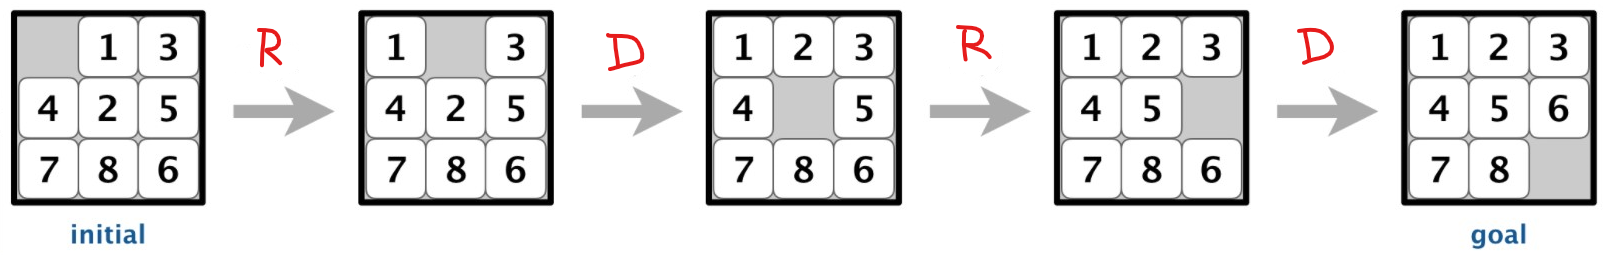

In [27]:
class Puzzle(Problem):
  """
  The values of the state member variables of instances of this class are
  represented as a string as follows:

  "12345678_" where '_' represents the empty tile.

  The inital state of the Puzzle problem is completely random.
  """
  def actions(self, state):
    """ 
    Actions labeled with 'U', 'D', 'L' or 'R' indicate the direction taken by the
    blank space.

    eg: +-------+      +-------+
        | _ 2 3 |      | 1 2 3 |
        | 1 4 6 | -D-> | _ 4 6 |
        | 7 5 8 |      | 7 5 8 |
        +-------+      +-------+
    """
    actions = []
    index = state.index('_')
    if int(index / 3) > 0:
      # "move up allowed"
      actions.append('U')

    if int(index / 3) < 2:
      # "move down allowe"
      actions.append('D')

    if index % 3 > 0:
      # "move left allowe"
      actions.append('L')

    if index % 3 < 2:
      # "move right allowd"
      actions.append('R')
    
    return actions

  def is_goal(self, state):
    """
    Return True if the problem is solved.  I.e.: human and all items are on 
    the right side.
    """
    Global.num_visits = Global.num_visits + 1
    return state == '12345678_' ;

  def transition(self, state, action):
    """ 
    Paths labeled with 'U', 'D', 'L' or 'R' indicate the direction taken by the
    blank space.

    eg: +-------+      +-------+
        | _ 2 3 |      | 1 2 3 |
        | 1 4 6 | -D-> | _ 4 6 |
        | 7 5 8 |      | 7 5 8 |
        +-------+      +-------+
    """
    index = state.index('_')
    if action == 'U':
      # "move up"
      new_state = list(state)
      new_state[index-3], new_state[index] = new_state[index], new_state[index-3]
      return ''.join(new_state)

    if action == 'D':
      # "move down"
      new_state = list(state)
      new_state[index+3], new_state[index] = new_state[index], new_state[index+3]
      return ''.join(new_state)

    if action == 'L':
      # "move left"
      new_state = list(state)
      new_state[index-1], new_state[index] = new_state[index], new_state[index-1]
      return ''.join(new_state)

    if action == 'R':
      # "move right"
      new_state = list(state)
      new_state[index+1], new_state[index] = new_state[index], new_state[index+1]
      return ''.join(new_state)

### Demonstration
The next 3 sections will attempt to solve our problem using:

* 8-Puzzle - BFS
* 8-Puzzle - DFS
* 8-Puzzle - ID (iterative deepening)

Solutions for the 8-puzzle problem using BFS

In [28]:
# find all solutions for the 8-puzzle problem using BFS
reset_globals()

#   Start             Solution
#   +-------+         +-------+
#   | _ 2 3 |         | 1 2 3 |
#   | 1 4 6 | -DRDR-> | 4 5 6 |
#   | 7 5 8 |         | 7 8 _ |
#   +-------+         +-------+
# 
# NOTE: Paths labeled with 'U', 'D', 'L' or 'R' indicate the direction taken by 
# the blank space. So in the example above, the initial state can go only 'D', 'L', 'R'.

Global.continue_search = False # We want BFS to stop, or we will be here all night

state = '_23146758' # starting state
problem = Puzzle(state)
bfs(problem)

print_result()


*******************************************************

Starting state:
+-------+
| _ 2 3 |
| 1 4 6 |
| 7 5 8 |
+-------+
Number of visits: 20
Number of non-looping solutions: 1
On visit number: 20 , solution: DRDR

*******************************************************



Solutions for the 8-puzzle problem using DFS

In [29]:
# find all solutions for the 8-puzzle problem using BFS
reset_globals()

#   Start             Solution
#   +-------+         +-------+
#   | _ 2 3 |         | 1 2 3 |
#   | 1 4 6 | -DRDR-> | 4 5 6 |
#   | 7 5 8 |         | 7 8 _ |
#   +-------+         +-------+
# 
# NOTE: Paths labeled with 'U', 'D', 'L' or 'R' indicate the direction taken by 
# the blank space. So in the example above, the initial state can go only 'D', 'L', 'R'.

Global.continue_search = False

state = '_23146758' # starting state
problem = Puzzle(state)
dfs(problem)

print_result()


*******************************************************

Starting state:
+-------+
| _ 2 3 |
| 1 4 6 |
| 7 5 8 |
+-------+
Number of visits: 672
Number of non-looping solutions: 1
On visit number: 672 , solution: RRDLLDRRULLDRRULLDRRULLDRRULLDRURDLLURRDLLURRDLLURRDLLURRDLLUURRDLLDRRULLDRRULLDRRULLDRRULLDRURDLLURRDLLURRDLLURRDLLURRDLLUURRDLLDRRULLDRRULLDRRULLDRRULLDRURDLLURRDLLURRDLLURRDLLURRDLLUURRDLLDRRULLDRRULLDRRULLDRRULLDRURDLLURRDLLURRDLLURRDLLURRDLLUURRDLLDRRULLDRRULLDRRULLDRRULLDRURDLLURRDLLURRDLLURRDLLURRDLLUURRDLLDRRULLDRRULLDRRULLDRRULLDRURDLLURRDLLURRDLLURRDLLURRDLLUURRDD

*******************************************************



Solutions for the 8-puzzle problem using ID

In [30]:
# find all solutions for the 8-puzzle problem using BFS
reset_globals()

#   Start             Solution
#   +-------+         +-------+
#   | _ 2 3 |         | 1 2 3 |
#   | 1 4 6 | -DRDR-> | 4 5 6 |
#   | 7 5 8 |         | 7 8 _ |
#   +-------+         +-------+
# 
# NOTE: Paths labeled with 'U', 'D', 'L' or 'R' indicate the direction taken by 
# the blank space. So in the example above, the initial state can go only 'D', 'L', 'R'.

Global.continue_search = False

state = '_23146758' # starting state
problem = Puzzle(state)
ids(problem, 15)

print_result()


*******************************************************

Starting state:
+-------+
| _ 2 3 |
| 1 4 6 |
| 7 5 8 |
+-------+
Number of visits: 20002
Number of non-looping solutions: 2
On visit number: 66 , solution: DRDR
On visit number: 4939 , solution: RDLURDLURDDR

*******************************************************



## Interactive problem solver

While solving the CGW problem, we can see that the limited depth-first search, breadth-first search, and iterative search are sufficient to find all non-looping solutions to the problem. But as the number of paths and states increase, we find that even rudimentary problems like the 8-puzzle becomes unsolvable.  

The following interactive problem solver will demonstrate how much the time and space complexity grows as the depth is increased.  
The interactive problem solver has a limit of 75 depth which is already too deep to solve in a reasonable amount of time, but the problem can go to depths of over 100_000 levels deep if left unbounded.

In [31]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

reset_globals()
dpth = 10  # default depth
prob = 'cgw' # which problem to solve
algo = 'dfs' # which algorithm to use
search_problems = {'cgw': CGW, '8puzzle': Puzzle}


def set_problem(problem):
  global prob
  prob = problem['new']

def set_algorithm(algorithm):
  global algo
  algo = algorithm['new']

def set_depth(depth):
  global dpth
  dpth = depth

def set_debug(verbose):
  Global.debug = verbose

def set_continue(cont):
  Global.continue_search = cont

def set_state(problem):
  global state
  if problem == 'cgw':
    state = (1, "CGW", "")
  elif problem == '8puzzle':
    state = generate_random_board()
  print("Initial state of problem:")
  print_state(state)
  print("Working...")

def go(button):
  set_state(prob)
  if algo == 'ids':
    ids(search_problems[prob](state), dpth)
  elif algo == 'dfs':
    dls(search_problems[prob](state), dpth)
  else:
    bfs(search_problems[prob](state), dpth)
  print_result()
  reset_globals()

algo_dropdown = widgets.Dropdown(
    options=[('Depth First Search', 'dfs'), 
             ('Iterative Deepening Search', 'ids'), 
             ('Breadth First Search', 'bfs')],
    description='algorithm',
)
algo_dropdown.observe(set_algorithm, names='value')

problem_dropdown = widgets.Dropdown(
    options=[('CGW', 'cgw'), ('8 Puzzle', '8puzzle')],
    description='problem',
)
problem_dropdown.observe(set_problem, names='value')

display(algo_dropdown, problem_dropdown)

interact(set_depth, depth=widgets.IntSlider(min=1, max=40, step=1, value=10))
interact(set_debug, verbose=True);
interact(set_continue, cont=widgets.Checkbox(value=True, description='find all solutions'))

go_btn = widgets.Button(description='Start Search!')
go_btn.on_click(go)
display(go_btn)

Dropdown(description='algorithm', options=(('Depth First Search', 'dfs'), ('Iterative Deepening Search', 'ids'…

Dropdown(description='problem', options=(('CGW', 'cgw'), ('8 Puzzle', '8puzzle')), value='cgw')

interactive(children=(IntSlider(value=10, description='depth', max=40, min=1), Output()), _dom_classes=('widge…

interactive(children=(Checkbox(value=True, description='verbose'), Output()), _dom_classes=('widget-interact',…

interactive(children=(Checkbox(value=True, description='find all solutions'), Output()), _dom_classes=('widget…

Button(description='Start Search!', style=ButtonStyle())

To see why this is happening, let's see how our tree grows as we increase the depth of our breadth-first search.  

_Note that the results will be different for iterative depth-first search and bounded depth-first search, but the lesson will be the same._

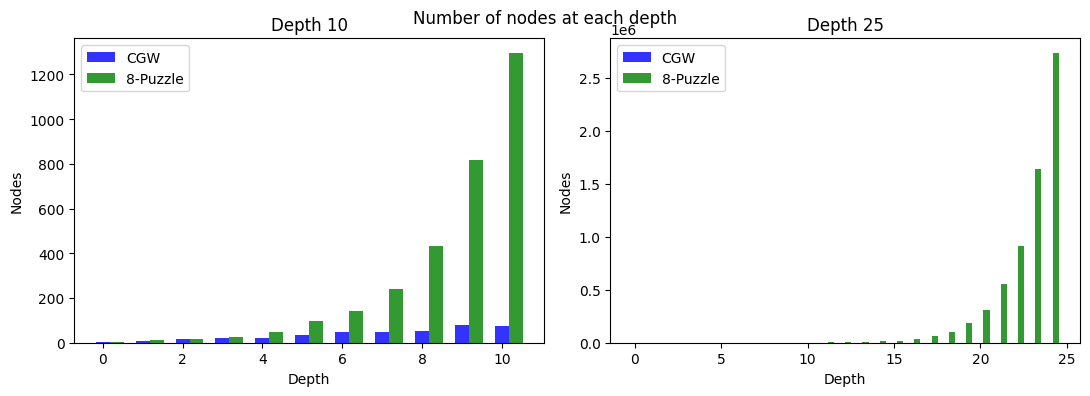

In [32]:
# BFS of CGW and 8Puzzle, a bar chart with x-axis representing the depth and 
# y-axis representing the number of states at the given depth.

import numpy as np
import matplotlib.pyplot as plt

# data to plot
cgw = (4, 7, 15, 20, 23, 34, 47, 47, 54, 78, 73, 61, 64, 54, 20, 15, 10, 3, 0, 0 , 0, 0, 0, 0, 0)
puzzle = (4, 12, 16, 24, 48, 96, 144, 240, 432, 816, 1296, 2256, 3856, 7080, 11568, 20496, 34432, 62400, 103088, 184128, 307072, 553344, 917936, 1644936, 2737168)

cgw2 = (4, 7, 15, 20, 23, 34, 47, 47, 54, 78, 73)
puzzle2 = (4, 12, 16, 24, 48, 96, 144, 240, 432, 816, 1296)

index = np.arange(len(cgw))
index2 = np.arange(len(cgw2))
bar_width = 0.35
opacity = 0.8

fig, axs = plt.subplots(1,2)
fig.suptitle('Number of nodes at each depth')
fig.set_figwidth(11)
fig.set_figheight(4)

axs[1].bar(index, cgw, bar_width, alpha=opacity, color='b', label='CGW')
axs[1].bar(index + bar_width, puzzle, bar_width, alpha=opacity, color='g', label='8-Puzzle')
axs[1].legend()
plt.setp(axs[1], xlabel='Depth', ylabel='Nodes', title='Depth 25')

axs[0].bar(index2, cgw2, bar_width, alpha=opacity, color='b', label='CGW')
axs[0].bar(index2 + bar_width, puzzle2, bar_width, alpha=opacity, color='g', label='8-Puzzle')
axs[0].legend()
plt.setp(axs[0], xlabel='Depth', ylabel='Nodes', title='Depth 10')

plt.tight_layout()
plt.show()

Looking at the nodes generated, we can see that the CGW problem seems to grow linearly, but the 8-Puzzle blows up!
To explain this, we will need to look at the branching factor of each problem at each level.

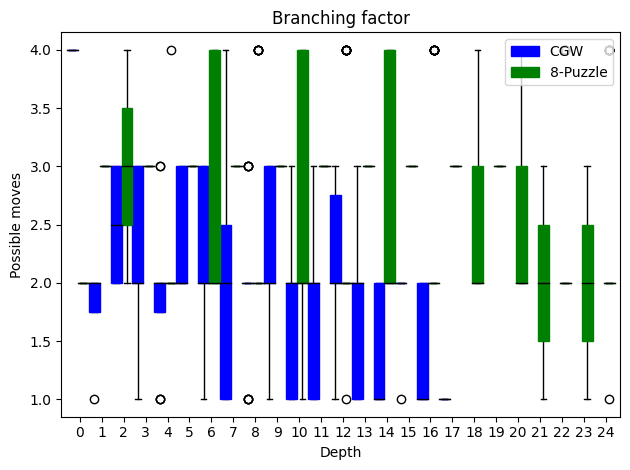

In [33]:
# BFS on CGW and 8P; a box-whisker plot showing the 0,25,50,75,100 percentiles 
# of the number of moves that are possible at each level of depth

import numpy as np
import matplotlib.pyplot as plt
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

# data to plot
n_groups = 25
cgw_data = ((4,), (2, 2, 2, 1), (3, 2, 3, 3, 2, 2), (2, 1, 3, 3, 3, 2, 1, 3, 2), (2, 2, 1, 3, 2, 3, 2, 2, 2, 2, 1, 1), (3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 2, 2), (2, 1, 3, 3, 2, 3, 2, 2, 1, 3, 3, 2, 3, 2, 2, 1, 3, 2, 1, 1, 3, 2), (1, 3, 2, 4, 2, 1, 3, 2, 2, 2, 1, 3, 2, 4, 2, 1, 3, 2, 2, 1, 2, 1, 1), (2, 3, 2, 2, 2, 1, 2, 2, 1, 3, 2, 2, 2, 2, 3, 2, 2, 2, 1, 2, 2, 2, 1, 3, 2, 2, 2), (3, 2, 2, 1, 3, 3, 2, 3, 2, 2, 3, 2, 2, 1, 1, 3, 2, 3, 2, 2, 1, 3, 3, 2, 3, 2, 2, 3, 2, 2, 2, 2, 1, 3, 1, 2), (2, 1, 3, 2, 2, 2, 1, 2, 1, 3, 2, 1, 3, 2, 2, 1, 3, 2, 1, 1, 2, 1, 3, 2, 2, 1, 2, 1, 3, 2, 1, 3, 2, 2, 1, 1, 3, 2, 1, 1), (2, 2, 1, 3, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 3, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1), (3, 2, 2, 1, 1, 3, 2, 3, 2, 3, 2, 2, 2, 1, 2, 3, 2, 2, 2, 2, 1, 3, 3, 2, 3, 2, 2, 2, 2, 2), (2, 1, 3, 2, 1, 1, 2, 1, 3, 2, 1, 1, 3, 2, 1, 2, 1, 1, 3, 2, 1, 2, 1, 3, 2, 1, 1, 3, 2, 1, 2), (1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1), (1, 2, 2, 2, 2, 2, 2, 2), (1, 1, 2, 1, 2, 1, 2), (1, 1, 1), (), (), (), (), (), (), ())
puzzle_data = ((2,), (3,), (2, 4), (3,), (2, 2, 2, 2, 2, 2, 2, 4), (3,), (2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4), (3,), (2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4), (3,), (2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4), (3,), (2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4), (3,), (2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4), (3,), (2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4), (3,), (2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4), (3,), (2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4), (1,2,3), (2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4), (3,1), (1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4))

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

positions = list(range(n_groups))
bp1 = plt.boxplot(cgw_data, positions=positions, patch_artist=True,
            boxprops=dict(facecolor='b', color='b'),
            medianprops=dict(color='black'),
            )

for i,e in enumerate(positions):
  positions[i]=e+0.5
bp2 = plt.boxplot(puzzle_data, positions=positions, patch_artist=True,
            boxprops=dict(facecolor='g', color='g'),
            medianprops=dict(color='black'),
            )

plt.xlabel('Depth')
plt.ylabel('Possible moves')
plt.title('Branching factor')
plt.xticks(index + bar_width, range(25))
plt.legend([bp1["boxes"][0], bp2["boxes"][0]], ['CGW', '8-Puzzle'], loc='upper right')

plt.tight_layout()
plt.show()


# Denouement

## 8-Puzzle using breadth-first search

For this analysis, we will generate 50 random 8-puzzle boards and try to solve them using breadth-first search. We will limit our search to 25 levels deep and record the number of **nodes visited**, **depth** to the solutions, and the **number of non-looping paths** to the solution (if any).

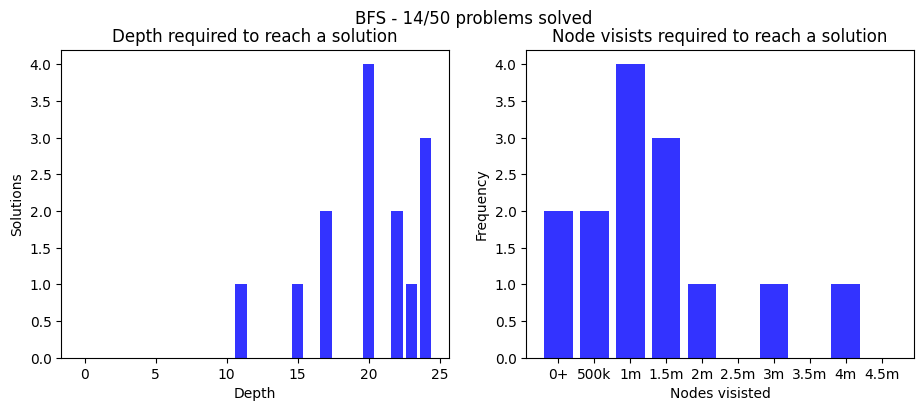

In [34]:
# a bar chart with x-axis representing the depth and y-axis representing the 
# number of solutions found at that depth over the 50 trials

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = range(25)
y_pos = np.arange(len(objects))
performance = [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,2,0,0,4,0,2,1,3]
# index     = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]

solutions_in_range = [2,2,4,3,1,0,1,0,1,0]
visisted_range = ['0+', '500k', '1m', '1.5m', '2m', '2.5m', '3m', '3.5m', '4m', '4.5m']

fig, axs = plt.subplots(1,2)
fig.suptitle('BFS - 14/50 problems solved')
fig.set_figwidth(11)
fig.set_figheight(4)
axs[0].bar(y_pos, performance, align='center', alpha=0.8, color='b')
plt.setp(axs[0], xlabel='Depth', ylabel='Solutions', title='Depth required to reach a solution')

axs[1].bar(visisted_range, solutions_in_range, align='center', alpha=0.8, color='b')
plt.setp(axs[1], xlabel='Nodes visisted', ylabel='Frequency', title='Node visists required to reach a solution')

plt.show()

#### Official Performance of BFS
Time complexity: O(b^(d+1))
Space complexity: O(b^(d+1))

_where **b = branching factor** and **d = depth of shallowest goal** node_

## 8-Puzzle using iterative deepening search

For this analysis, we will generate 50 random 8-puzzle boards and try to solve them using iterative deepening search. We will limit our search to 25 levels deep and record the number of **nodes visited**, **depth** to the solutions, and the **number of non-looping paths** to the solution (if any).

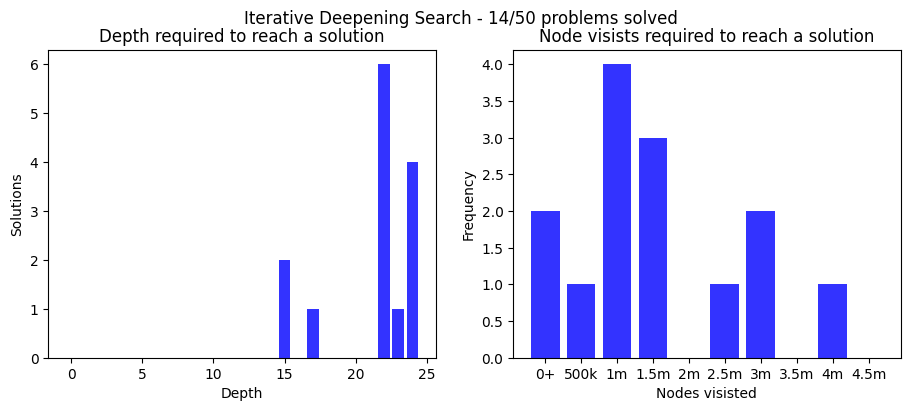

In [35]:
# a bar chart with x-axis representing the depth and y-axis representing the 
# number of solutions found at that depth over the 50 trials

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = range(25)
y_pos = np.arange(len(objects))
performance = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,6,1,4]

solutions_in_range = [2,1,4,3,0,1,2,0,1,0]
visisted_range =     ['0+', '500k', '1m', '1.5m', '2m', '2.5m', '3m', '3.5m', '4m', '4.5m']

fig, axs = plt.subplots(1,2)
fig.suptitle('Iterative Deepening Search - 14/50 problems solved')
fig.set_figwidth(11)
fig.set_figheight(4)
axs[0].bar(y_pos, performance, align='center', alpha=0.8, color='b')
plt.setp(axs[0], xlabel='Depth', ylabel='Solutions', title='Depth required to reach a solution')

axs[1].bar(visisted_range, solutions_in_range, align='center', alpha=0.8, color='b')
plt.setp(axs[1], xlabel='Nodes visisted', ylabel='Frequency', title='Node visists required to reach a solution')

plt.show()

#### Official Performance of IDS
Time complexity: O(b^(d+1))
Space complexity: O(b*d)

_where **b = branching factor** and **d = depth of shallowest goal** node_

## 8-Puzzle using limited depth-first search

For this analysis, we will generate 50 random 8-puzzle boards and try to solve them using limited depth-first search. We will limit our search to 25 levels deep and record the number of **nodes visited**, **depth** to the solutions, and the **number of non-looping paths** to the solution (if any).

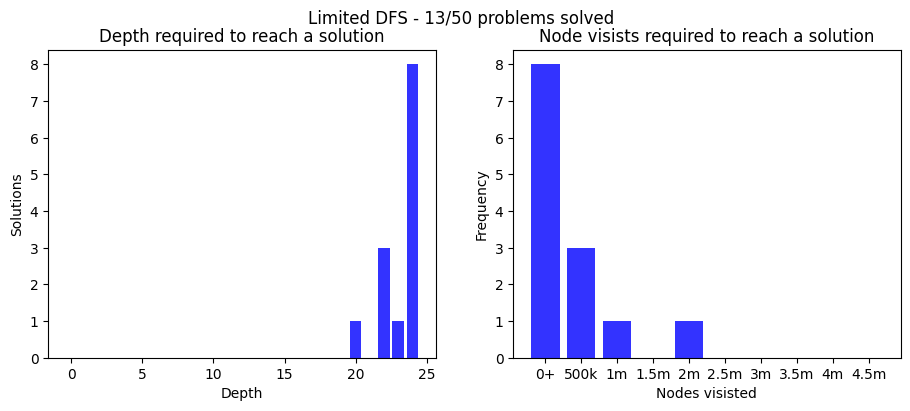

In [36]:
# a bar chart with x-axis representing the depth and y-axis representing the 
# number of solutions found at that depth over the 50 trials

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = range(25)
y_pos = np.arange(len(objects))
performance = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,1,8]

solutions_in_range = [8,3,1,0,1,0,0,0,0,0]
visisted_range =     ['0+', '500k', '1m', '1.5m', '2m', '2.5m', '3m', '3.5m', '4m', '4.5m']

fig, axs = plt.subplots(1,2)
fig.suptitle('Limited DFS - 13/50 problems solved')
fig.set_figwidth(11)
fig.set_figheight(4)
axs[0].bar(y_pos, performance, align='center', alpha=0.8, color='b')
plt.setp(axs[0], xlabel='Depth', ylabel='Solutions', title='Depth required to reach a solution')

axs[1].bar(visisted_range, solutions_in_range, align='center', alpha=0.8, color='b')
plt.setp(axs[1], xlabel='Nodes visisted', ylabel='Frequency', title='Node visists required to reach a solution')

plt.show()

#### Official Performance of BFS
Time complexity: O(b^(m+1))
Space complexity: O(mb)

_where **b = branching factor** and **m = max depth** node_